<a href="https://colab.research.google.com/github/ifeomamegwai/Le-Wagon-python-and-ML/blob/main/Customers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 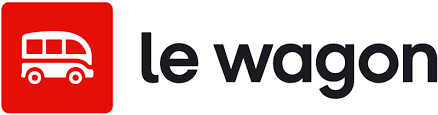

# Orders clustering

The purpose of the exercise is to extract different "typical profiles" of orders and consumers from Greenweez's turnover data. To achieve this, we will apply unsupervised learning algorithms to create order clusters.

## Orders clustering

a) Execute the cell below to load  the data into a `df` variable.

It will select 50k orders randomly (`ORDER BY rand()` in the SQL query).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              6.58            32.17           0.00           0.00   
1              0.00            77.99           5.24           0.00   
2              0.00            33.61           0.00           0.00   
3              0.00             0.00          30.90          34.48   
4              0.00            16.78           0.00           0.00   

   turnover_fresh  promo_rate  
0             0.0         NaN  
1             0.0    0.071597  
2             0.0         NaN  
3             0.0    0.244876  
4             0.0    0.050179

b) Which features do you see?

In [ ]:
# your code here
#All the columns can qualify as features to extract different "typical profiles of orders and consumers,
#except maybe, promo_rate which may also be a feature under some circumstances

Are there any null values?

In [ ]:
# your code here
df.isnull().sum() # promo_rate has	16040 null values

turnover_grocery        0
turnover_beauty         0
turnover_baby           0
turnover_home           0
turnover_fresh          0
promo_rate          16286
dtype: int64

c) Replace null values (if any exist) with 0 using `fillna()`

In [ ]:
# your code here
# Replace NaN values in 'tags' and 'goals' columns with an empty string ""
df['promo_rate'].fillna(0, inplace=True)

In [ ]:
# your code here
df.isnull().sum()

turnover_grocery    0
turnover_beauty     0
turnover_baby       0
turnover_home       0
turnover_fresh      0
promo_rate          0
dtype: int64

In [ ]:
df.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              6.58            32.17           0.00           0.00   
1              0.00            77.99           5.24           0.00   
2              0.00            33.61           0.00           0.00   
3              0.00             0.00          30.90          34.48   
4              0.00            16.78           0.00           0.00   

   turnover_fresh  promo_rate  
0             0.0    0.000000  
1             0.0    0.071597  
2             0.0    0.000000  
3             0.0    0.244876  
4             0.0    0.050179

d) In a variable called `df_orders`, keep all the turnover columns from the original df. These features will help us cluster orders.

In [ ]:
# your code here
df_orders = df.drop(columns=["promo_rate"])


In [ ]:
df_orders.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              6.58            32.17           0.00           0.00   
1              0.00            77.99           5.24           0.00   
2              0.00            33.61           0.00           0.00   
3              0.00             0.00          30.90          34.48   
4              0.00            16.78           0.00           0.00   

   turnover_fresh  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

e) Use plotly.express and a box chart to see if the distribution of turnover is different per category (i.e. feature).

In [ ]:
# your code here
import pandas as pd
import plotly.express as px

# Create a box plot using Plotly Express
fig = px.box(df_orders,
             title='Distribution of Turnover by Category',
             labels={'variable': 'Turnover Category', 'value': 'Turnover Amount'})
fig.show()

f) Most entries for the column 'turnover_fresh' do not differ from zero, it seems like people are not purchasing these products enough to conduct a meaningful analysis.

Delete the `turnover_fresh` column from `df_orders`.

In [ ]:
# your code here
df_orders= df.drop(columns=["turnover_fresh", "promo_rate"])



In [ ]:
df_orders.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0              6.58            32.17           0.00           0.00
1              0.00            77.99           5.24           0.00
2              0.00            33.61           0.00           0.00
3              0.00             0.00          30.90          34.48
4              0.00            16.78           0.00           0.00

g) Train a first kmeans algorithm with two a-priori clusters. Remember that distance based models, such as k-means, are greatly effected by scale. Be sure to standardize your data appropriately.


In [ ]:
#normalizing my data
from sklearn.preprocessing import MinMaxScaler
mn_scaler= MinMaxScaler().fit(df_orders)
df_orders_scaled = pd.DataFrame(mn_scaler.transform(df_orders), columns=df_orders.columns)
df_orders_scaled.head()




turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0          0.003479         0.054202       0.000000       0.000000
1          0.000000         0.131402       0.003850       0.000000
2          0.000000         0.056628       0.000000       0.000000
3          0.000000         0.000000       0.022705       0.014671
4          0.000000         0.028272       0.000000       0.000000

In [ ]:
##clustering Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10).fit(df_orders_scaled)

df_orders_scaled['k_means_predict'] = kmeans.labels_
df_orders_scaled.head()



turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0          0.003479         0.054202       0.000000       0.000000   
1          0.000000         0.131402       0.003850       0.000000   
2          0.000000         0.056628       0.000000       0.000000   
3          0.000000         0.000000       0.022705       0.014671   
4          0.000000         0.028272       0.000000       0.000000   

   k_means_predict  
0                1  
1                1  
2                1  
3                0  
4                0

h) What is inertia for a clustering algorithm? What is inertia for this model?

In [ ]:
# your code here
kmeans.inertia_

113.48934730545399

i) How do we know if 2 clusters a priori was a good choice or not?
Which method could you use?

The elbow method will allow of to check inertias with differing numbers of starting clusters.

j) You will use elbow method.

You will need to loop over different values of  𝑘  (in range 1 to 10) and stores the inertia at each iteration in order to plot its evolution and select the best  𝑘.

Complete code below to do so.

In [ ]:
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:
  kmeans = KMeans(n_clusters=k, n_init=10).fit(df_orders_scaled)

  inertias.append(kmeans.inertia_)
inertias

    # your code here

[8901.84195049901,
 113.48929023273313,
 85.08610180148975,
 70.80308973721792,
 59.66376817497869,
 53.734173496332446,
 48.220752012479196,
 43.03499892831236,
 39.8952646035231]

k) Use plotly.express to display a line chart of all inertias.

Which number of cluster you recommend and why?

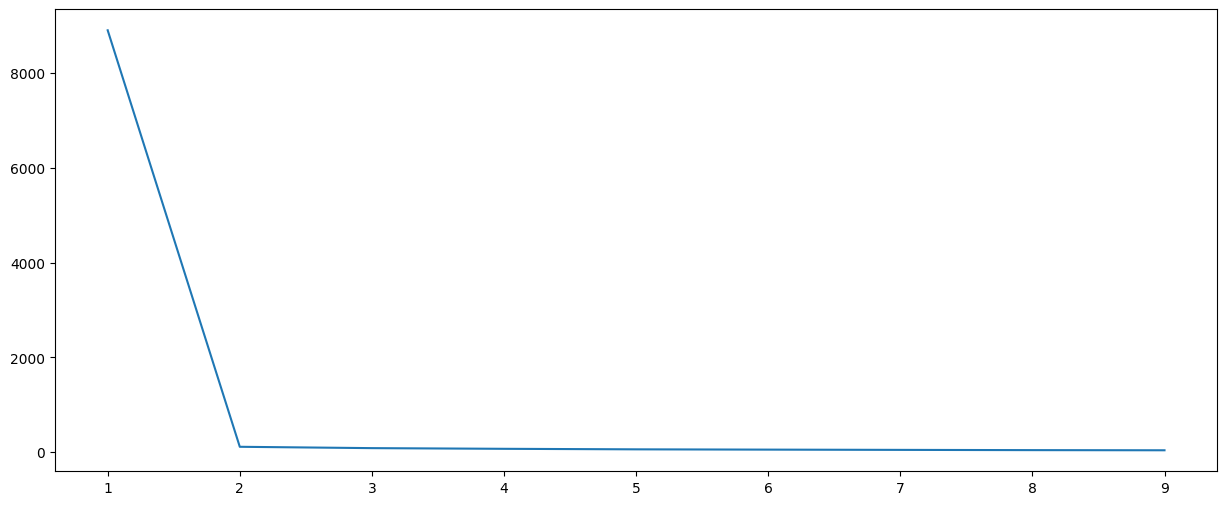

In [ ]:
# your code here
plt.figure(figsize=(15,6))

plt.plot( n_k, inertias)
plt.show()

<details>
    <summary><i>Solution</i></summary>

It seems like the largest decreases in inertia occur from 1 -> 2 centroids and then 2 -> 3 centroids. Accordingly, choosing 3 centroids seems like a sensible place to start.
</details>

l) Train a new model with 3 clusters a priori. Use parameter n_init=100 to select best model among 100 tries.

Use `predict()` method to predict in which cluster each row of `df_orders` belong to. We will store results in a `labels` variable.

In [ ]:
# your code here
##clustering Kmeans
kmeans = KMeans(n_clusters=3, n_init=100)
labels = kmeans.fit_predict(df_orders_scaled)

In [ ]:
kmeans.inertia_

85.08584588053603

m) Use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library to count visualize number of samples per cluster. It is well distributed?

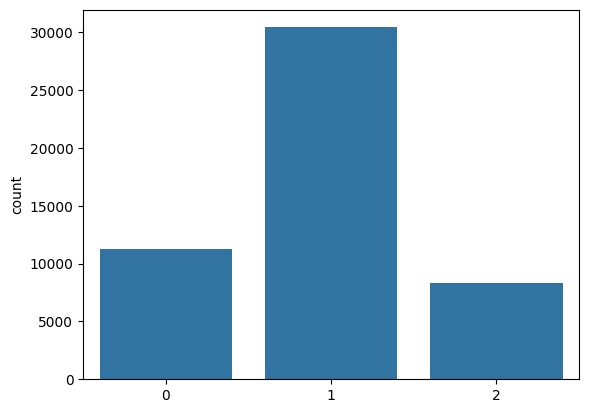

In [ ]:
# your code here
import seaborn as sns

sns.countplot(x=labels);

One bigger cluster... but overall, orders are well distributed.

n) Each KMeans cluster has a center (centroid).

You can get the values of the center for each cluster using the `.cluster_centers_` attribute on your KMeans object.

Create a DataFrame with each cluster's centroid values and the names of the features that the model has been trained on.

In [ ]:
# your code here
pd.DataFrame(kmeans.cluster_centers_, columns=df_orders_scaled.columns)

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0          0.010007         0.093656       0.004005       0.003612   
1          0.018499         0.013517       0.003478       0.006308   
2          0.003182         0.007261       0.067197       0.001403   

   k_means_predict  
0     1.000000e+00  
1    -1.088296e-13  
2     3.178013e-14

o) What conclusions can you draw? What are the different order profiles that emerge?

<details>
    <summary><i>Solution</i></summary>

Remember that the values in each column are the relative coordinates for each centroid across the features. The greater the magnitude of a feature for a cluster, the more important that feature is to that cluster.

In the example above we can see 3 types of orders : 1 with mostly groceries, 1 with baby products and 1 that is more evenly distributed mainly mixing beauty and home products.
</details>

p) Add to `df` a new column label containing labels of each sample.

In [ ]:
# your code here
df["label"] = labels

q) What does this instruction do? What can you say?

In [ ]:
df[df["promo_rate"] > 0].groupby("label").size() / df.groupby("label").size()

label
0    0.760916
1    0.651102
2    0.640800
dtype: float64

Where the promotion rate is greater than zero, we can see that the cluster we have associated with greater grocery turnover uses promotion codes more than others.